# 1. Introduction

The aim of this Notebook is to do classification on hands images forming "Rocks", "Scissor" and "Paper" gestures as follows :

![Rock / Scissor / Paper](https://www.ultimatecampresource.com/wp-content/uploads/2019/10/Rock-paper-scissors-Posse.jpeg)

**Source of Images** :

Photos have been taken using a smartphone. These are the hands of a group of 9 students (I was part of the group) pursuing the ENSEEIHT (Toulouse) MS in Data Science. We tried to vary the background and the position / orientation of our hands to get as much variability as possible in the dataset. Roughly 270 photos have been taken 20% of which will be used in the valdiation set.

**Methodology** :

We will do transfer learning using Resnet34 architecture. We will do 10 epochs. Only the dense layers of the CNN will be trained.

We will apply what we've learned from Fast.ai deep learning course (Part 1 - Lesson 1) and show how fastai made advanced deep learning techniques easily doable with very few lines of code.

We are running this notebook on Google Colaboratory Research Platform in order to have free access to GPU resources. We use it because

* It has instant approval.
* It requires minimal installation.
* It is free :D !

# 2. Getting started

Before running into this lab, we start by running the following script from fast.ai in order to get the latest version of fastai installed and ready to use.

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


The next steps are :

* Mounting My Google Drive (Since I got the dataset there)
* Setting my path to the dataset
* Creating a folder where we can save outputs in case of when it is needed.
* Imports from fastai

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'VALDOM/PHOTO_MAIN_VALDOM'

In [0]:
from fastai.imports import *
path = Path(base_dir)
dest = path/"folder"
dest.mkdir(parents=True, exist_ok=True)

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

# 3. Loading the data

Now we create an `ImageDataBunch` using the `from_folder` method. We chose that method since our photos have been organized such that there is a folder for each class. The folders are named after the form of the hand (i.e. 'Paper', 'Rock' and 'Scissors')

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, valid_pct = 0.2)
data.classes

['Paper', 'Rock', 'Scissors']

In [0]:
??get_transforms

The data is as follows:

* 212 Images in the training set
* 52 Images in the testing set

In [0]:
data.normalize()

ImageDataBunch;

Train: LabelList (212 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Paper,Paper,Paper,Paper,Paper
Path: /content/gdrive/My Drive/VALDOM/PHOTO_MAIN_VALDOM;

Valid: LabelList (52 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Paper,Rock,Rock,Paper,Rock
Path: /content/gdrive/My Drive/VALDOM/PHOTO_MAIN_VALDOM;

Test: None

We use the `show_batch` method in order to show example of images in the dataset

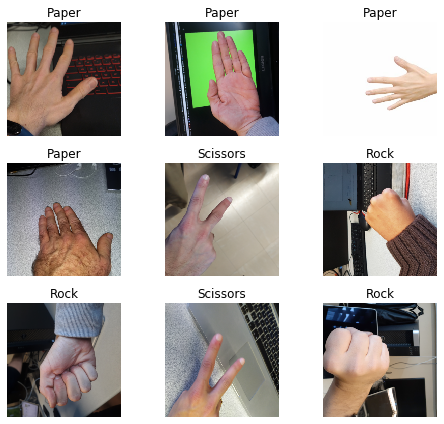

In [0]:
data.show_batch(rows=3, figsize=(7,6))

# 4. Training the model

Now that we got a grasp of our dataset, we will be training a model.
We will use `cnn_learner` function, a built in fastai function to load famous CNN (Convolutional Neural Network) Architectures. Basically, the functions needs the three following arguments :

* The DataBunch
* The specification of the model to be downloaded and trained (here we will use a resnet34)
* And the metric (we chose accuracy here)

We will be running the training over 10 epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.289781,2.337119,0.346154,01:12
1,1.950126,1.578291,0.442308,01:12
2,1.643621,0.883781,0.653846,01:11
3,1.336166,0.772210,0.730769,01:11
4,1.138403,0.501840,0.788462,01:11
5,1.000788,0.436318,0.807692,01:10
6,0.871411,0.410406,0.807692,01:11
7,0.778179,0.376875,0.846154,01:11
8,0.703659,0.381165,0.865385,01:12
9,0.647732,0.386216,0.884615,01:12


The model is then saved and given a name (`stage-1`) that can be used to load it later.

**P.S.** : Note that we only did finetuning (i.e. we trained the last dense layers only)

In [0]:
learn.save('stage-1')

# 5. Interpreting the Model

Despite what people say, Deep Learning models are easy to interpret. Fastai is well equipped for this.

In the interpretation phase :

* We plot the validation data samples for which we have the highest loss values (i.e. the samples for which the model predicted a very low probability of the image belonging to its actual class)
* We plot a confusion matrix

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

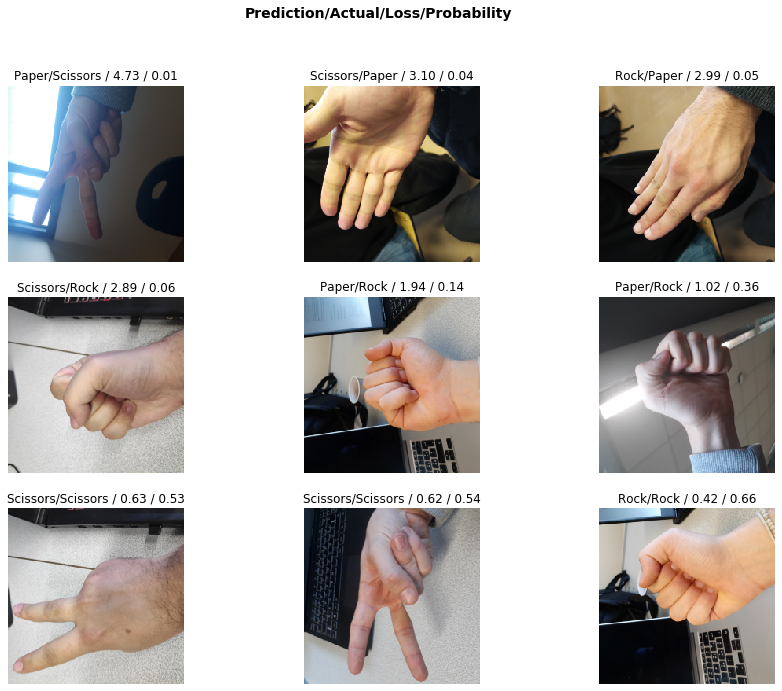

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

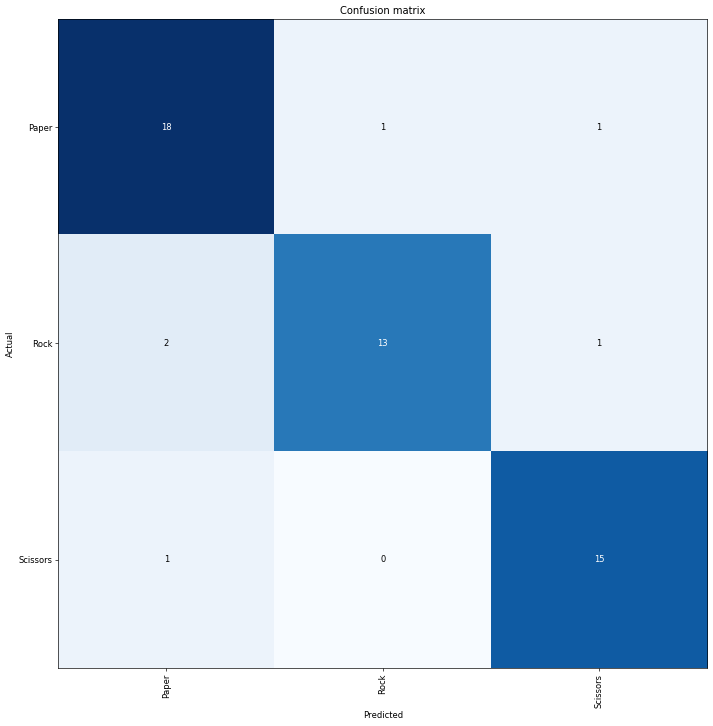

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# 6. Making predictions on random hand pictures from the internet

In [0]:
pred_path = Path(base_dir + '/random_hand_images')

In [0]:
il = ImageList.from_folder(pred_path); il

ImageList (4 items)
Image (3, 1280, 1920),Image (3, 651, 960),Image (3, 910, 910),Image (3, 250, 202)
Path: /content/gdrive/My Drive/VALDOM/PHOTO_MAIN_VALDOM/random_hand_images

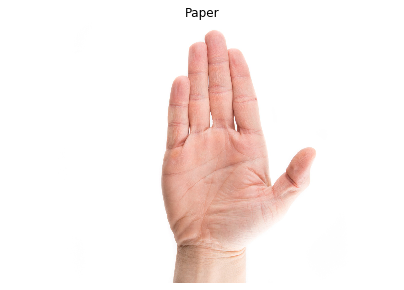

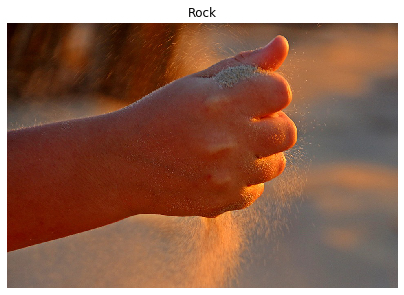

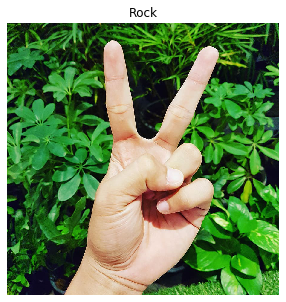

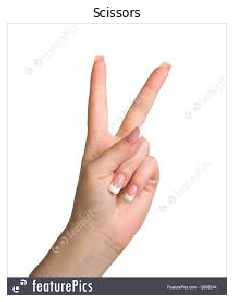

In [0]:
for img in il:
  prediction = learn.predict(img)
  img.show(figsize=(7,5), title = str(prediction[0]))